# Capstone Kelompok 5

Classification Employee Dataset

#### Import library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

- `numpy` adalah library untuk komputasi numerik, terutama dengan array dan matriks besar.
- `pandas` adalah library untuk manipulasi dan analisis data, menggunakan struktur data seperti DataFrame.
- `seaborn` adalah library untuk visualisasi data berbasis matplotlib yang lebih mudah digunakan.
- `matplotlib.pyplot` adalah modul dari matplotlib yang menyediakan fungsi plotting.
- `sklearn.metrics.classification_report` adalah fungsi untuk membuat laporan klasifikasi yang berisi metrik seperti precision, recall, f1-score.
- `sklearn.metrics.accuracy_score` adalah fungsi untuk menghitung akurasi dari prediksi.
- `sklearn.metrics.confusion_matrix` adalah fungsi untuk menghitung confusion matrix, yang menampilkan jumlah prediksi benar dan salah untuk masing-masing kelas.
- `sklearn.preprocessing.LabelEncoder` adalah kelas untuk mengubah label (kategori) menjadi nilai numerik.
- `sklearn.model_selection.train_test_split` adalah fungsi untuk membagi dataset menjadi set pelatihan dan pengujian.
- `sklearn.tree.DecisionTreeClassifier` adalah kelas untuk membuat model klasifikasi berbasis pohon keputusan.
- `xgboost` adalah library untuk implementasi algoritma gradient boosting yang sangat efisien dan akurat.

#### Preprocessing

In [ ]:
# initialize directory path
path = '/content/drive/MyDrive/Colab Notebooks/Stupen/Projek Akhir (Capstone)/Dataset/Employee.csv'

mendeklarasi path dataset yang akan digunakan pada drive

In [ ]:
df=pd.read_csv(path)
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


Pertama, `pd.read_csv(path)` digunakan untuk membaca data dari file CSV yang terletak pada jalur yang ditentukan oleh variabel path. Fungsi ini mengonversi data dari file CSV tersebut menjadi sebuah DataFrame pandas, yang merupakan struktur data dua dimensi dengan label pada baris dan kolom yang memudahkan manipulasi dan analisis data. Kemudian, variabel df menyimpan DataFrame yang dihasilkan dari pembacaan file CSV ini. Akhirnya, df dipanggil untuk menampilkan DataFrame tersebut, sehingga kita dapat melihat isi dari dataset yang telah dibaca ke dalam memori

In [ ]:
print(df.isna().sum())
print(df.isnull().any())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64
Education                    False
JoiningYear                  False
City                         False
PaymentTier                  False
Age                          False
Gender                       False
EverBenched                  False
ExperienceInCurrentDomain    False
LeaveOrNot                   False
dtype: bool


Baris `print(df.isna().sum())` menghitung dan mencetak jumlah nilai yang hilang (NA) di setiap kolom, sedangkan `print(df.isnull().any())` memeriksa apakah ada nilai yang hilang (null) di setiap kolom dan mencetak hasilnya sebagai True atau False. Ini membantu dalam mengidentifikasi dan menangani data yang hilang dalam dataset.

In [ ]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

Kode `df.nunique()` digunakan untuk menghitung jumlah nilai unik di setiap kolom dalam DataFrame df. Fungsi ini mengembalikan sebuah Series yang berisi jumlah nilai unik masing-masing kolom, yang berguna untuk memahami keragaman data dalam setiap fitur di dataset.

In [ ]:
df.duplicated().sum()

1889

Kode `df.duplicated().sum()` digunakan untuk mendeteksi dan menghitung jumlah baris duplikat dalam DataFrame df.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Kode `df.info()` digunakan untuk menampilkan ringkasan informasi mengenai DataFrame df.

In [ ]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Kode `df.describe()` digunakan untuk menghasilkan statistik deskriptif dari DataFrame df

In [ ]:
df.shape

(4653, 9)

In [ ]:
df = df.drop_duplicates()
df.shape

(2764, 9)

Pertama, metode `df.drop_duplicates()` digunakan untuk menghapus baris-baris yang duplikat dalam DataFrame df, sehingga hanya menyisakan baris-baris yang unik. Operasi ini menghasilkan DataFrame baru yang tidak memiliki duplikat. Selanjutnya, df.shape mengembalikan bentuk dari DataFrame yang telah dibersihkan dalam bentuk tuple, yang menunjukkan jumlah baris dan kolom dalam DataFrame tersebut. Dengan demikian, kita dapat mengetahui ukuran dataset setelah penghapusan baris duplikat, memastikan bahwa dataset siap untuk analisis lebih lanjut tanpa adanya data yang redundant.

<ipython-input-16-4a20df71f763>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Education', palette='Set2')


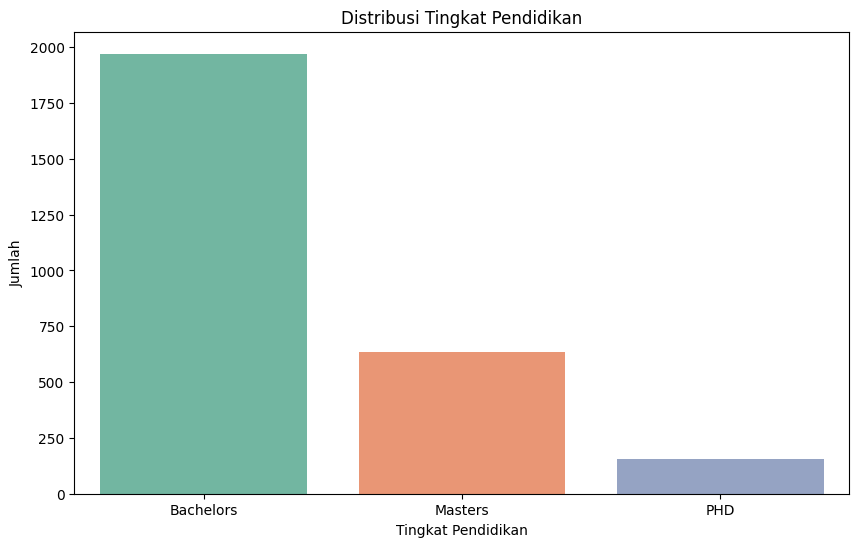

In [ ]:
# Distribusi Tingkat Pendidikan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', palette='Set2')
plt.title('Distribusi Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah')
plt.show()

 Grafik batang ini menunjukkan jumlah karyawan dengan berbagai tingkat pendidikan (Sarjana dan Magister). Ini membantu memahami latar belakang pendidikan karyawan dalam dataset

In [ ]:
# Menghitung frekuensi nilai unik dalam kolom 'Education'
edu_count = df.Education.value_counts()

Kode `df.Education.value_counts()` digunakan untuk menghitung frekuensi nilai unik dalam kolom Education dari DataFrame df.

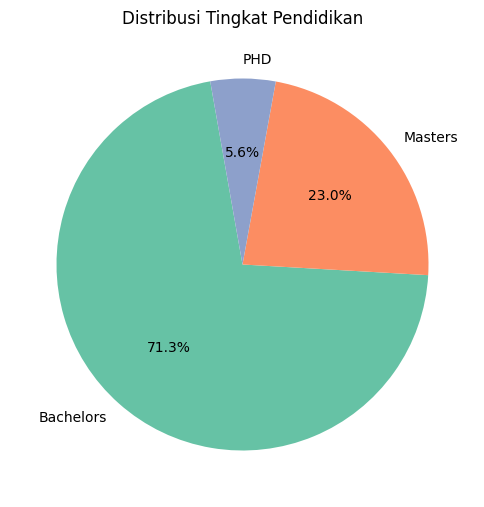

In [ ]:
# Mengatur warna menggunakan palet Set2 dari Seaborn
colors = sns.color_palette('Set2', len(edu_count))

# Membuat pie chart
plt.figure(figsize=(6, 8))
plt.pie(edu_count, labels=edu_count.index, autopct='%1.1f%%', startangle=100, colors=colors)
plt.title('Distribusi Tingkat Pendidikan')
plt.show()

<ipython-input-22-485d07378573>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='City', palette='Set2')


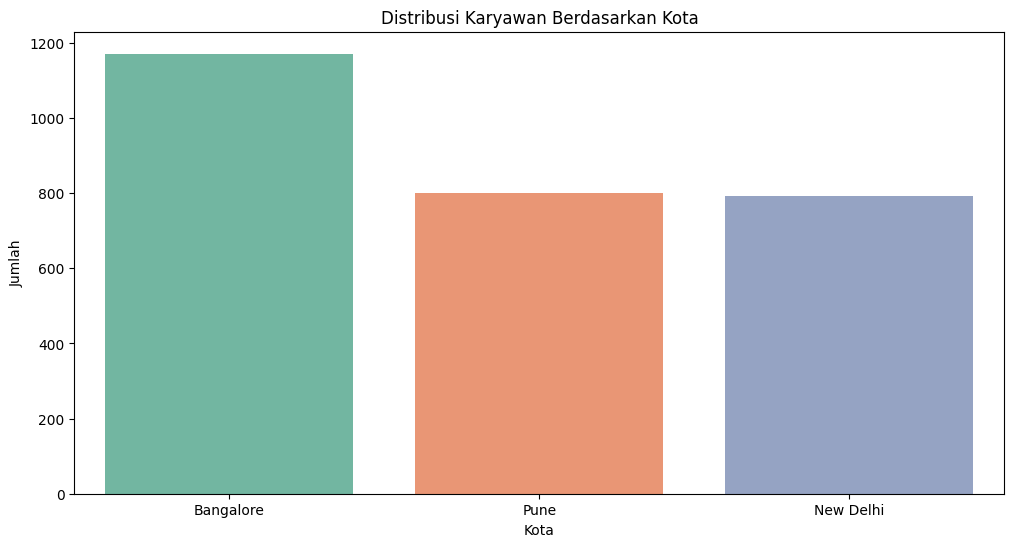

In [ ]:
# Distribusi Karyawan Berdasarkan Kota
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='City', palette='Set2')
plt.title('Distribusi Karyawan Berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah')
plt.show()

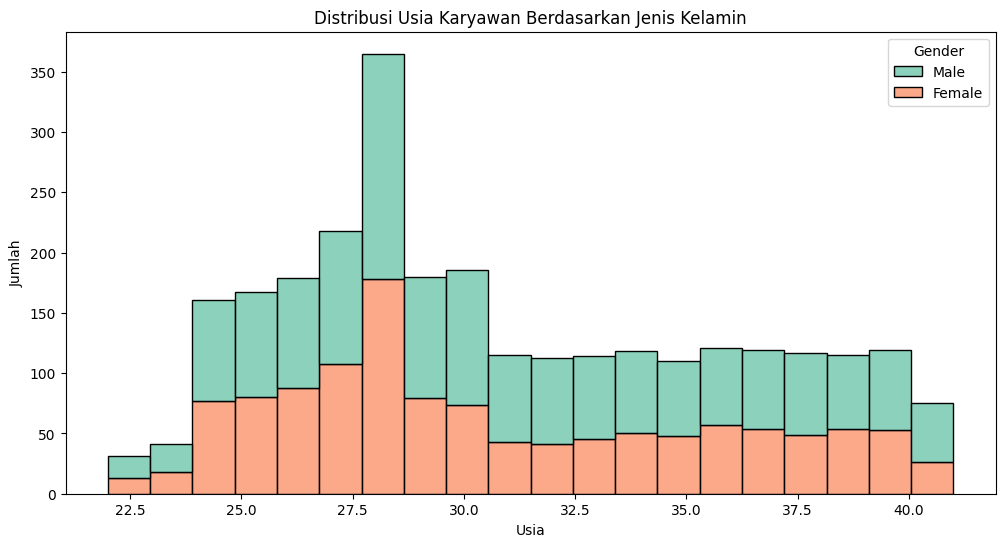

In [ ]:
# Distribusi Usia Karyawan Berdasarkan Jenis Kelamin
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', palette='Set2', bins=20)
plt.title('Distribusi Usia Karyawan Berdasarkan Jenis Kelamin')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

<ipython-input-24-3c127cd8b83f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='LeaveOrNot', y='ExperienceInCurrentDomain', palette='Set2')


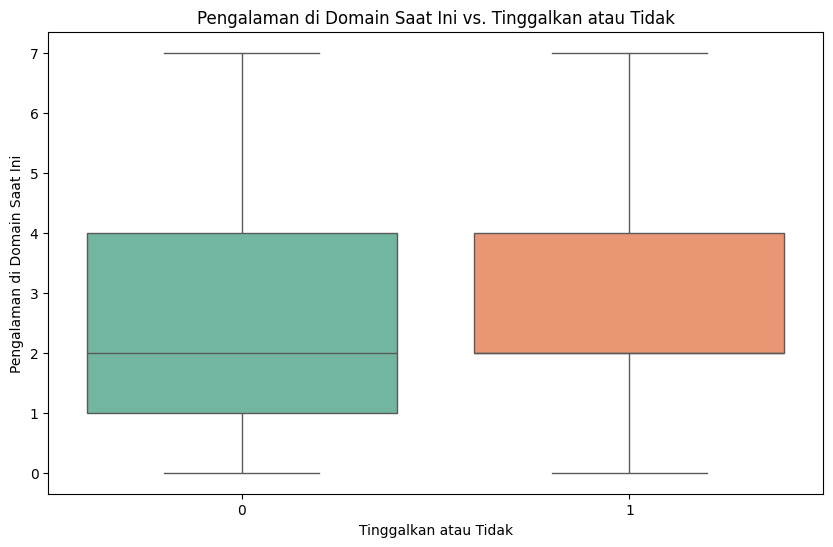

In [ ]:
# Pengalaman di Domain Saat Ini vs. Tinggalkan atau Tidak
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='LeaveOrNot', y='ExperienceInCurrentDomain', palette='Set2')
plt.title('Pengalaman di Domain Saat Ini vs. Tinggalkan atau Tidak')
plt.xlabel('Tinggalkan atau Tidak')
plt.ylabel('Pengalaman di Domain Saat Ini')
plt.show()

<ipython-input-25-ba978a2c43a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PaymentTier', palette='Set2')


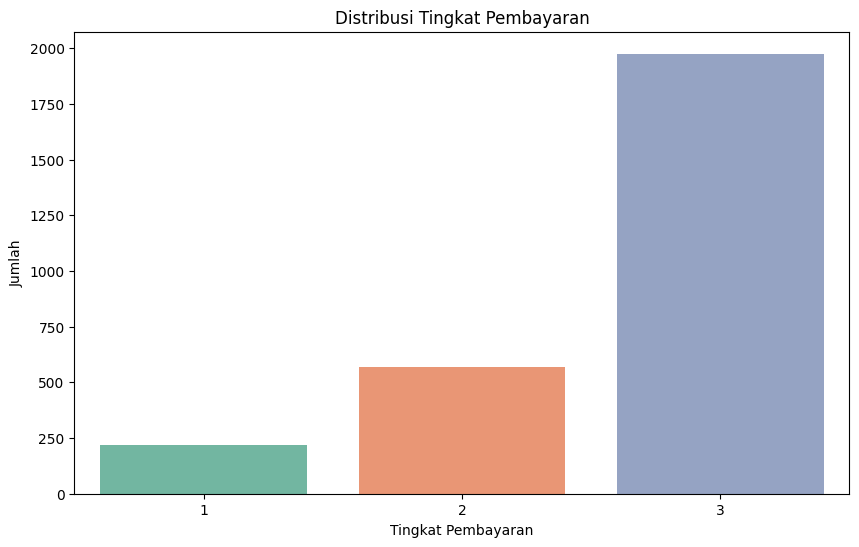

In [ ]:
# Distribusi Tingkat Pembayaran
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentTier', palette='Set2')
plt.title('Distribusi Tingkat Pembayaran')
plt.xlabel('Tingkat Pembayaran')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
df.JoiningYear.value_counts()

JoiningYear
2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: count, dtype: int64

Kode `df.JoiningYear.value_counts()` digunakan untuk menghitung frekuensi nilai unik dalam kolom 'JoiningYear' dari DataFrame df.

<ipython-input-27-2d8f9cbc47da>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JoiningYear', palette='Set2', edgecolor='black')  # Membuat count plot dengan penyesuaian warna (palette) dan warna tepi (edgecolor)


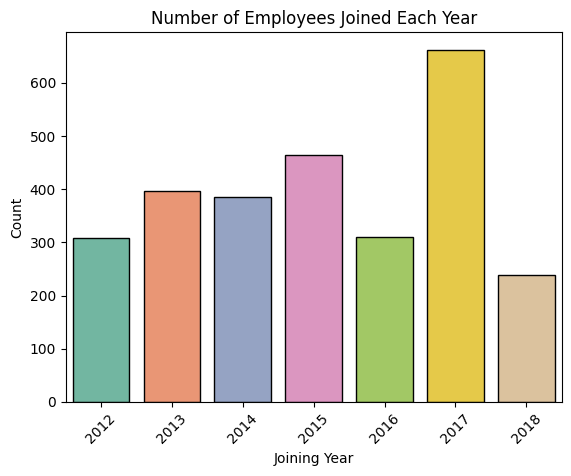

In [ ]:
sns.countplot(data=df, x='JoiningYear', palette='Set2', edgecolor='black')  # Membuat count plot dengan penyesuaian warna (palette) dan warna tepi (edgecolor)
plt.xlabel('Joining Year')  # Menambah label sumbu x
plt.ylabel('Count')  # Menambah label sumbu y
plt.title('Number of Employees Joined Each Year')  # Menambah judul plot
plt.xticks(rotation=45)  # Memutar label sumbu x sebesar 45 derajat untuk memperjelas penampilan tahun
plt.show()  # Menampilkan plot

In [ ]:
pd.crosstab(df.JoiningYear,df.City,values=df.Age,aggfunc='median')

City,Bangalore,New Delhi,Pune
JoiningYear,,,
2012,31,28,29
2013,30,28,29
2014,31,28,30
2015,31,28,30
2016,31,28,29
2017,30,30,30
2018,31,29,29


Kode `pd.crosstab(df.JoiningYear, df.City, values=df.Age, aggfunc='median')` digunakan untuk membuat tabel silang (crosstab) antara kolom 'JoiningYear' dan 'City' dari DataFrame df, dengan menggunakan nilai median dari kolom 'Age' sebagai nilai dalam tabel silang.

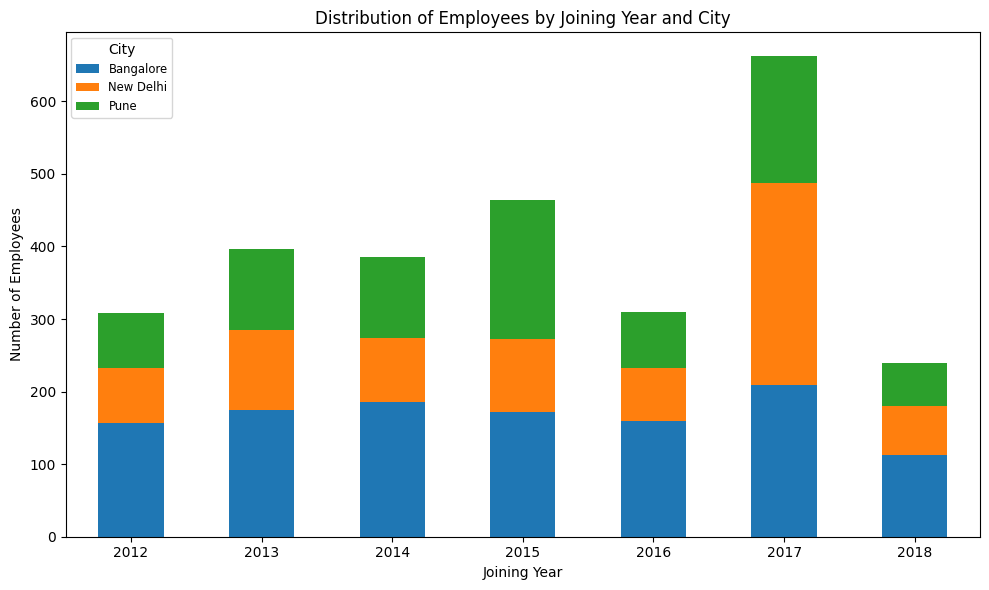

In [ ]:
city_joinyear = df.groupby(['JoiningYear', 'City']).size().unstack()  # Membuat DataFrame berdasarkan grup JoiningYear dan City
ax = city_joinyear.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Joining Year')  # Menambah label sumbu x
plt.ylabel('Number of Employees')  # Menambah label sumbu y
plt.title('Distribution of Employees by Joining Year and City')  # Menambah judul plot

plt.legend(title='City', loc='upper left', fontsize='small')  # Menambah legenda dengan judul 'City' dan penempatan di kiri atas

plt.xticks(rotation=0)  # Memutar label sumbu x menjadi horizontal
plt.tight_layout()  # Mengatur layout plot agar lebih rapi
plt.show()  # Menampilkan plot

In [ ]:
pd.crosstab(df.Gender,df.Education)

Education,Bachelors,Masters,PHD
Gender,,,
Female,894,278,63
Male,1077,359,93


Kode `pd.crosstab(df.Gender, df.Education)` digunakan untuk membuat tabel silang antara kolom 'Gender' dan 'Education' dari DataFrame df.

In [ ]:
pivot_table = pd.crosstab(df['Gender'], df['Education'], values=df['Age'], aggfunc=['median', 'min', 'max'])

pivot_table = pivot_table.reset_index()
pivot_table

Gender    median                   min                   max  \
Education         Bachelors Masters PHD Bachelors Masters PHD Bachelors   
0          Female        30      28  29        22      22  22        41   
1            Male        31      28  28        22      22  22        41   

                       
Education Masters PHD  
0              41  40  
1              41  41

- `pd.crosstab(df['Gender'], df['Education'], values=df['Age'], aggfunc=['median', 'min', 'max'])` digunakan untuk membuat pivot table yang menghitung statistik agregat dari kolom 'Age' (median, minimum, dan maksimum) berdasarkan kombinasi nilai dalam kolom 'Gender' dan 'Education'. Fungsi crosstab() mengambil kolom 'Gender' sebagai baris dan kolom 'Education' sebagai kolom untuk tabel silang, dengan nilai 'Age' sebagai nilai yang akan diagregasi. Parameter `aggfunc=['median', 'min', 'max']` menunjukkan jenis agregasi yang akan dilakukan pada nilai 'Age'.

- `pivot_table.reset_index()` digunakan untuk mengatur ulang indeks pivot table, sehingga hasilnya menjadi DataFrame biasa. Dengan melakukan ini, kolom 'Gender' dan 'Education' tidak lagi menjadi indeks dari DataFrame, tetapi menjadi kolom biasa.

<Axes: xlabel='Education', ylabel='count'>

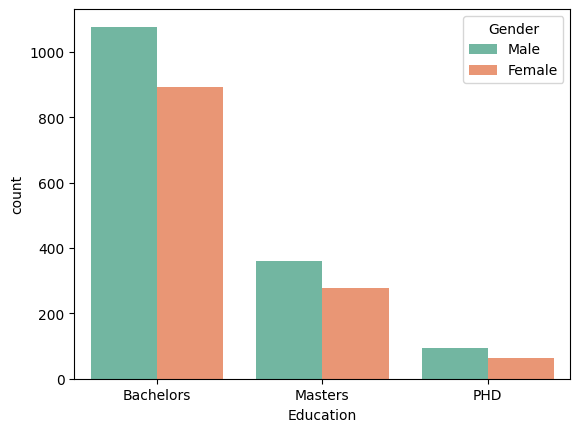

In [ ]:
sns.countplot(data=df,x=df.Education,hue='Gender', palette='Set2')

In [ ]:
pd.crosstab(df.PaymentTier,df.Gender)

Gender,Female,Male
PaymentTier,,
1,115,103
2,367,203
3,753,1223


Kode `pd.crosstab(df.PaymentTier, df.Gender)` menghasilkan tabel silang yang menunjukkan jumlah kemunculan setiap kombinasi nilai dalam kolom 'PaymentTier' dan 'Gender' dari DataFrame df.

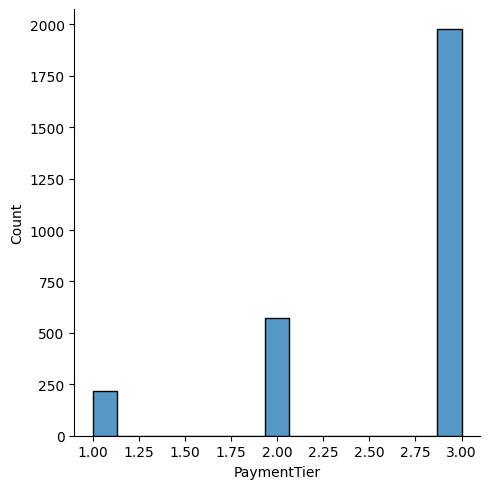

In [ ]:
sns.displot(df['PaymentTier'])

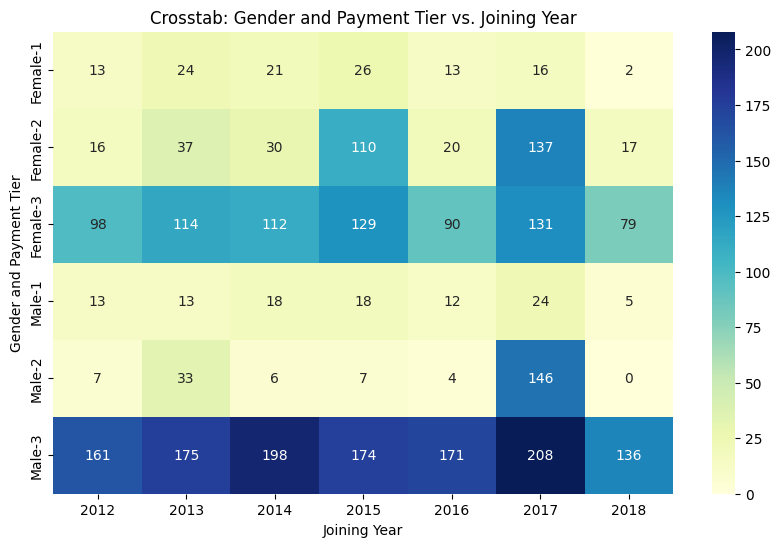

In [ ]:
x=pd.crosstab([df.Gender,df.PaymentTier],df.JoiningYear)
plt.figure(figsize=(10, 6))
sns.heatmap(x, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Joining Year')
plt.ylabel('Gender and Payment Tier')
plt.title('Crosstab: Gender and Payment Tier vs. Joining Year')
plt.show()

- `pd.crosstab([df.Gender, df.PaymentTier], df.JoiningYear)` digunakan untuk membuat tabel silang yang menghitung jumlah kemunculan setiap kombinasi nilai dalam kolom 'Gender' dan 'PaymentTier', dengan 'JoiningYear' sebagai variabel tambahan.

- `plt.figure(figsize=(10, 6))` digunakan untuk membuat gambar heatmap dengan ukuran 10x6 inci.

- `sns.heatmap(x, annot=True, fmt='d', cmap='YlGnBu')` menghasilkan heatmap dengan menggunakan data dari tabel silang x. Parameter annot=True menambahkan nilai-nilai di dalam setiap sel heatmap, fmt='d' mengatur format tampilan nilai sebagai bilangan bulat, dan cmap='YlGnBu' menentukan palet warna yang digunakan untuk heatmap.

- `plt.xlabel('Joining Year'), plt.ylabel('Gender and Payment Tier')`, dan `plt.title('Crosstab: Gender and Payment Tier vs. Joining Year')` digunakan untuk menambahkan label sumbu x, sumbu y, dan judul pada heatmap.

- `plt.show()` digunakan untuk menampilkan heatmap yang telah dibuat.

In [ ]:
df.EverBenched.value_counts()

EverBenched
No     2403
Yes     361
Name: count, dtype: int64

Kode `df.EverBenched.value_counts()` digunakan untuk menghitung frekuensi kemunculan setiap nilai dalam kolom 'EverBenched' dari DataFrame df.

In [ ]:
pd.crosstab(df.Gender,df.EverBenched)

EverBenched,No,Yes
Gender,,
Female,1098,137
Male,1305,224


Kode `pd.crosstab(df.Gender, df.EverBenched)` menghasilkan tabel silang yang menunjukkan jumlah kemunculan setiap kombinasi nilai dalam kolom 'Gender' dan 'EverBenched' dari DataFrame df.

<Axes: xlabel='EverBenched', ylabel='count'>

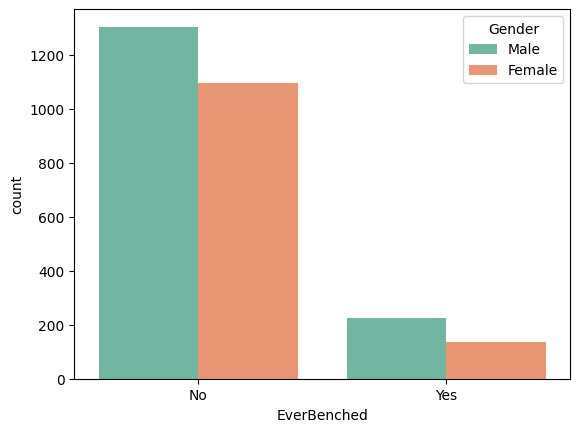

In [ ]:
sns.countplot(data=df,x='EverBenched',hue='Gender', palette='Set2')

<Figure size 1200x800 with 0 Axes>

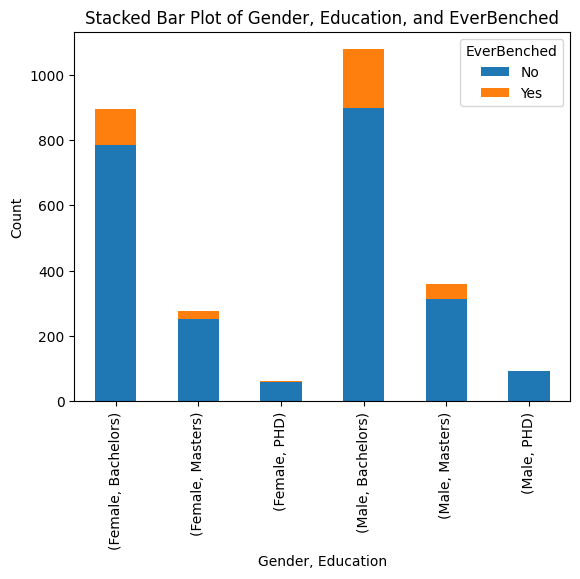

In [ ]:
x = pd.crosstab([df['Gender'], df['Education']], df['EverBenched'])

plt.figure(figsize=(12, 8))

x.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender, Education, and EverBenched')
plt.xlabel('Gender, Education')
plt.ylabel('Count')

# Show the plot
plt.show()

- `pd.crosstab([df['Gender'], df['Education']], df['EverBenched'])` digunakan untuk membuat tabel silang antara kolom 'Gender', 'Education', dan 'EverBenched'. Ini menghitung jumlah kemunculan setiap kombinasi nilai dalam kolom 'Gender' dan 'Education', dengan mempertimbangkan nilai dalam kolom 'EverBenched'.

- `plt.figure(figsize=(12, 8))` digunakan untuk membuat gambar dengan ukuran 12x8 inci.

- `x.plot(kind='bar', stacked=True)` digunakan untuk membuat stacked bar plot dari tabel silang yang dihasilkan sebelumnya. Dengan parameter kind='bar', plot jenis ini dipilih, dan stacked=True menghasilkan grafik batang bertumpuk.

- `plt.title('Stacked Bar Plot of Gender, Education, and EverBenched'), plt.xlabel('Gender, Education')`, dan `plt.ylabel('Count')` digunakan untuk menambahkan judul dan label sumbu x dan y pada plot.

- `plt.show()` digunakan untuk menampilkan plot yang telah dibuat.

In [ ]:
pd.crosstab(df.ExperienceInCurrentDomain,df.Gender)

Gender,Female,Male
ExperienceInCurrentDomain,,
0,119,168
1,192,241
2,302,379
3,202,249
4,204,221
5,210,260
6,2,6
7,4,5


Kode `pd.crosstab(df.ExperienceInCurrentDomain, df.Gender)` menghasilkan tabel silang yang menunjukkan jumlah kemunculan setiap kombinasi nilai dalam kolom 'ExperienceInCurrentDomain' dan 'Gender' dari DataFrame df.

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

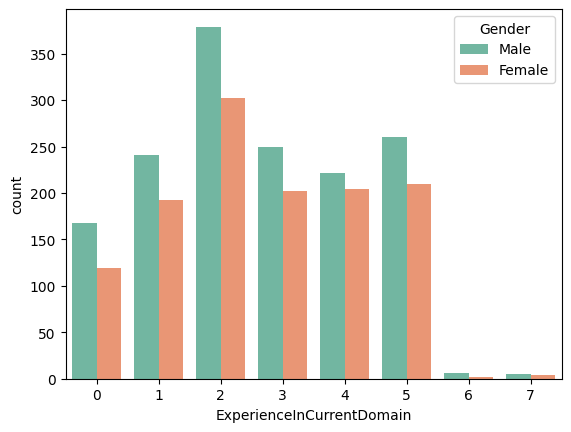

In [ ]:
sns.countplot(data=df,x='ExperienceInCurrentDomain',hue='Gender', palette='Set2')

Kode tersebut menggunakan seaborn untuk membuat count plot yang menunjukkan jumlah karyawan berdasarkan tingkat pengalaman dalam domain saat ini (ExperienceInCurrentDomain), dengan warna yang dibedakan berdasarkan jenis kelamin (Gender).

In [ ]:
pd.crosstab(df.ExperienceInCurrentDomain,df.PaymentTier)

PaymentTier,1,2,3
ExperienceInCurrentDomain,,,
0,23,56,208
1,35,75,323
2,48,167,466
3,37,92,322
4,32,91,302
5,41,87,342
6,1,1,6
7,1,1,7


Kode `pd.crosstab(df.ExperienceInCurrentDomain, df.PaymentTier)` menghasilkan tabel silang yang menunjukkan jumlah kemunculan setiap kombinasi nilai dalam kolom 'ExperienceInCurrentDomain' dan 'PaymentTier' dari DataFrame df.

In [ ]:
df.ExperienceInCurrentDomain.value_counts()

ExperienceInCurrentDomain
2    681
5    470
3    451
1    433
4    425
0    287
7      9
6      8
Name: count, dtype: int64

Kode `df.ExperienceInCurrentDomain.value_counts()` menghitung jumlah kemunculan setiap nilai unik dalam kolom 'ExperienceInCurrentDomain' dari DataFrame df.

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

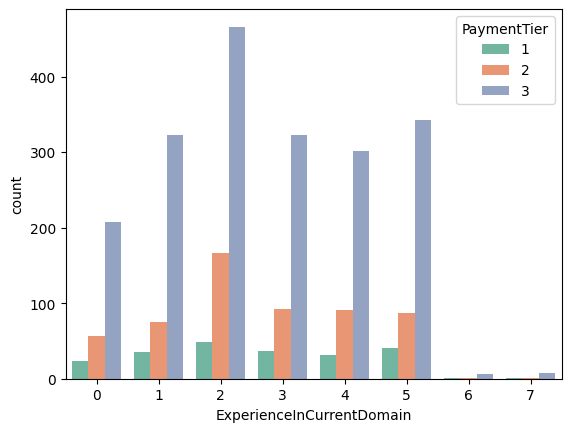

In [ ]:
sns.countplot(data=df,x='ExperienceInCurrentDomain',hue='PaymentTier', palette='Set2')

Kode ini menggunakan seaborn untuk membuat count plot yang menunjukkan jumlah karyawan berdasarkan tingkat pengalaman dalam domain saat ini (ExperienceInCurrentDomain), dengan warna yang membedakan berdasarkan tingkat pembayaran (PaymentTier).

<ipython-input-46-28604c31edef>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='Gender', y='ExperienceInCurrentDomain', kind='box', palette='Set2')


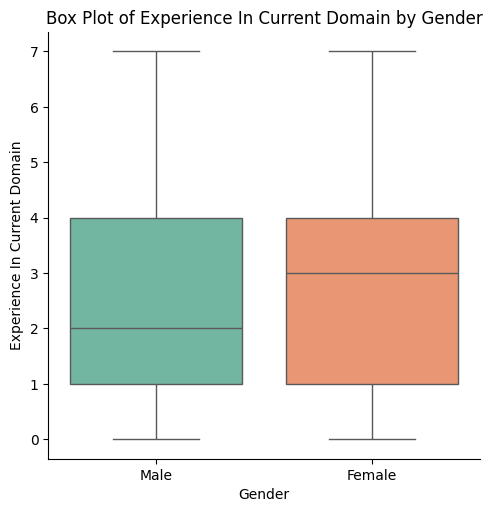

In [ ]:
sns.catplot(data=df, x='Gender', y='ExperienceInCurrentDomain', kind='box', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Experience In Current Domain')
plt.title('Box Plot of Experience In Current Domain by Gender')
plt.show()


Kode ini menggunakan seaborn untuk membuat box plot yang menampilkan distribusi tingkat pengalaman dalam domain saat ini (ExperienceInCurrentDomain) untuk setiap jenis kelamin (Gender).

<ipython-input-47-fa7560a18878>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='Gender', y='Age', kind='box', palette='Set2')


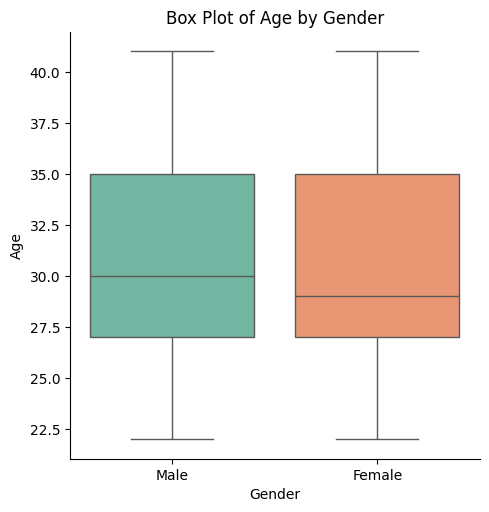

In [ ]:
sns.catplot(data=df, x='Gender', y='Age', kind='box', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Box Plot of Age by Gender')
plt.show()

Kode `sns.catplot(data=df, x='Gender', y='Age', kind='box')` menghasilkan box plot yang menunjukkan distribusi umur (Age) untuk setiap jenis kelamin (Gender). Box plot ini memberikan gambaran tentang sebaran umur di antara berbagai jenis kelamin, dengan menunjukkan nilai-nilai statistik seperti median, kuartil, dan outlier untuk setiap kelompok jenis kelamin.

In [ ]:
df.LeaveOrNot.value_counts()

LeaveOrNot
0    1676
1    1088
Name: count, dtype: int64

Kode `df.LeaveOrNot.value_counts()` menghitung jumlah kemunculan setiap nilai dalam kolom 'LeaveOrNot' dari DataFrame df.

In [ ]:
x=pd.crosstab([df.Gender,df.EverBenched],df.LeaveOrNot)
x

LeaveOrNot            0    1
Gender EverBenched          
Female No           558  540
       Yes           63   74
Male   No           916  389
       Yes          139   85

Kode `pd.crosstab([df.Gender, df.EverBenched], df.LeaveOrNot)` menghasilkan tabel silang yang menunjukkan jumlah kemunculan setiap kombinasi nilai dalam kolom 'Gender', 'EverBenched', dan 'LeaveOrNot' dari DataFrame df.

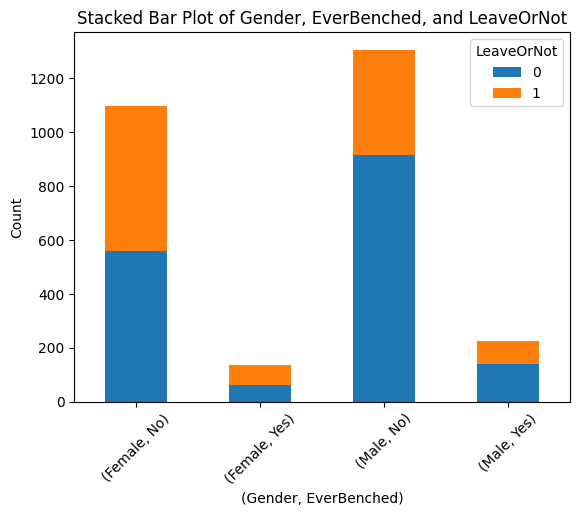

In [ ]:
x.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender, EverBenched, and LeaveOrNot')
plt.xlabel('(Gender, EverBenched)')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

- `x.plot(kind='bar', stacked=True)` menghasilkan stacked bar plot berdasarkan tabel silang x.
- `plt.title('Stacked Bar Plot of Gender, EverBenched, and LeaveOrNot'), plt.xlabel('(Gender, EverBenched)')`, dan `plt.ylabel('Count')` digunakan untuk menambahkan judul serta label sumbu x dan y pada plot.
- `plt.xticks(rotation=45)` digunakan untuk memutar label sumbu x sebesar 45 derajat untuk memperjelas penampilan keterangan sumbu x.

#### **Modeling**

**Encoding**

Encoding diperlukan dalam analisis data karena sebagian besar algoritma pembelajaran mesin membutuhkan input dalam bentuk numerik. Fitur-fitur kategorikal seperti jenis kelamin atau kota tempat tinggal tidak dapat direpresentasikan langsung dalam bentuk numerik, oleh karena itu encoding diperlukan untuk mengubahnya menjadi representasi yang dapat dimengerti oleh model. Selain itu, beberapa teknik pemodelan statistik juga memerlukan input dalam bentuk numerik untuk perhitungan yang tepat. Dengan melakukan encoding, kita dapat membangun model yang efektif dan melakukan analisis yang akurat, sehingga meningkatkan interpretasi model dan efisiensi komputasi

Alasan Penggunaan:
- One-Hot Encoding: Digunakan untuk kolom-kolom dengan kategori yang tidak memiliki urutan atau tingkat yang bermakna, sehingga menghindari asumsi model tentang urutan atau tingkat di antara kategori-kategori tersebut.
- Label Encoding: Digunakan untuk kolom-kolom dengan kategori yang memiliki urutan atau tingkat, sehingga memungkinkan model untuk menangkap hubungan ordinal antara kategori-kategori tersebut.

In [ ]:
# Encode with One-hot encoder
df = pd.get_dummies(df, columns=['City', 'Gender', 'EverBenched'])

One-Hot Encoding:
1. City: Karena kota tempat tinggal tidak memiliki urutan atau tingkat yang bermakna. Setiap kota dianggap sebagai kategori independen yang tidak memiliki hubungan ordinal satu sama lain. Menggunakan one-hot encoding akan menghasilkan kolom terpisah untuk setiap kota, memungkinkan model untuk menangkap perbedaan antara kota-kota tersebut.

2. Gender: Karena jenis kelamin juga tidak memiliki urutan atau tingkat yang bermakna. Pria dan wanita dianggap sebagai kategori independen yang tidak memiliki hubungan ordinal satu sama lain. One-hot encoding memungkinkan pembuatan kolom terpisah untuk setiap jenis kelamin, yang berguna untuk model dalam membedakan antara pria dan wanita.

3. EverBenched: Karena kehadiran atau ketiadaan mobilisasi tidak memiliki urutan bermakna. Ya dan Tidak dianggap sebagai kategori independen yang tidak memiliki hubungan ordinal satu sama lain. One-hot encoding akan menghasilkan kolom terpisah untuk kehadiran dan ketiadaan mobilisasi, yang membantu model dalam menangkap perbedaan antara karyawan yang pernah dan tidak pernah dimobilisasi.

In [ ]:
# Encode with Label encoder
le=LabelEncoder()
df["Education"]=le.fit_transform(df["Education"])

Label Encoding:
1. Education: Karena tingkat pendidikan memiliki urutan atau tingkat yang bermakna. Gelar sarjana (Bachelors) dianggap memiliki tingkat yang lebih rendah daripada gelar magister (Masters), dan seterusnya. Label encoding menghasilkan representasi numerik yang mempertahankan hubungan ordinal ini, memungkinkan model untuk menangkap perbedaan tingkat pendidikan dengan baik.

In [ ]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['LeaveOrNot'])  # Features
y = df['LeaveOrNot']  # Target variable

Kode tersebut bertujuan untuk membagi dataset menjadi fitur (features) dan variabel target. Variabel X berisi fitur-fitur atau atribut-atribut dari dataset, sedangkan variabel y berisi variabel target atau label yang ingin diprediksi. Pada kode `X = df.drop(columns=['LeaveOrNot'])`, kolom 'LeaveOrNot' dihapus dari DataFrame df, sehingga variabel X hanya berisi fitur-fitur lainnya. Sementara itu, pada kode `y = df['LeaveOrNot']`, kolom 'LeaveOrNot' dipilih sebagai variabel target, yang kemudian disimpan dalam variabel y.

Alasan di balik pembagian dataset menjadi fitur dan variabel target adalah untuk mempersiapkan dataset agar sesuai dengan kebutuhan pemodelan. Model machine learning akan menggunakan fitur-fitur dalam X untuk melakukan prediksi variabel target yang terdapat dalam y. Dengan memisahkan fitur dan variabel target, kita dapat mempersiapkan dataset dengan benar sebelum melakukan pelatihan model, sehingga memastikan model yang dibangun dapat memberikan hasil yang akurat dalam memprediksi variabel target berdasarkan fitur-fiturnya.

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Total train data : {len(X_train)}")
print(f"Total test data : {len(X_test)}")

Total train data : 1934
Total test data : 830


 Data dibagi menjadi set pelatihan (train) dan set pengujian (test). `X_train` dan `y_train` akan berisi fitur dan label dari set pelatihan, sedangkan `X_test` dan `y_test` akan berisi fitur dan label dari set pengujian. Data dibagi dengan menggunakan fungsi `train_test_split()` dari library scikit-learn, dengan parameter `test_size=0.3` yang menunjukkan bahwa 30% dari data akan digunakan sebagai data pengujian. Pengaturan `random_state=42` memastikan reproduktibilitas dari pembagian data tersebut.

Setelah pembagian data, kode mencetak jumlah total data dalam set pelatihan dan set pengujian menggunakan fungsi `len()`. Hal ini berguna untuk memastikan bahwa pembagian data telah dilakukan dengan benar dan bahwa proporsi data pelatihan dan pengujian sesuai dengan yang diinginkan.

Alasan di balik pembagian data menjadi set pelatihan dan pengujian adalah untuk menguji kinerja model pada data yang tidak digunakan dalam pelatihan. Dengan memisahkan data menjadi dua set, kita dapat mengukur seberapa baik model yang dibangun dalam melakukan prediksi pada data baru yang belum pernah dilihat sebelumnya.

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       499
           1       0.61      0.57      0.59       331

    accuracy                           0.68       830
   macro avg       0.67      0.66      0.66       830
weighted avg       0.68      0.68      0.68       830

[[377 122]
 [143 188]]


<Axes: >

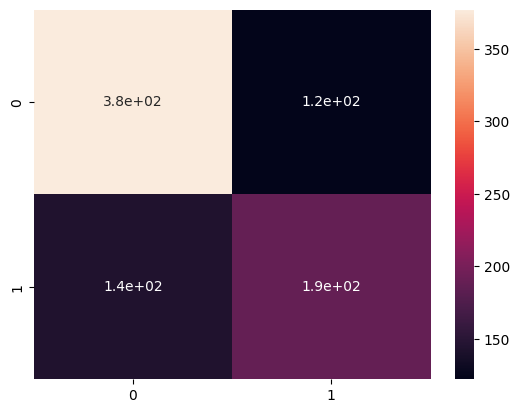

In [ ]:
# Initialize the Decision Tree classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict the labels for test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# show confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

Pada kode di atas, sebuah model Decision Tree Classifier diinisialisasi menggunakan `DecisionTreeClassifier()` dari scikit-learn. Setelah itu, model tersebut dilatih menggunakan data pelatihan `(X_train dan y_train)` melalui metode `.fit().` Model yang sudah dilatih kemudian digunakan untuk memprediksi label dari data pengujian `(X_test)` dengan menggunakan metode `.predict()`, yang hasilnya disimpan dalam variabel `y_pred`.

Untuk mengevaluasi kinerja model, digunakan metrik klasifikasi seperti classification report dan confusion matrix. Classification report dapat dicetak menggunakan classification_report`(y_test, y_pred)`, yang memberikan ringkasan metrik evaluasi seperti presisi, recall, dan f1-score untuk setiap kelas. Selain itu, confusion matrix juga dicetak menggunakan `confusion_matrix(y_test, y_pred)`, yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.

Selanjutnya, menggunakan seaborn, confusion matrix tersebut juga divisualisasikan dalam bentuk heatmap dengan `sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)`, di mana angka-angka pada heatmap menunjukkan jumlah prediksi yang benar dan salah untuk setiap kombinasi kelas. Hal ini membantu untuk dengan cepat memahami kinerja model dalam melakukan klasifikasi terhadap data pengujian.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6807228915662651


              precision    recall  f1-score   support

           0       0.76      0.87      0.81       499
           1       0.74      0.58      0.65       331

    accuracy                           0.75       830
   macro avg       0.75      0.72      0.73       830
weighted avg       0.75      0.75      0.74       830

[[433  66]
 [140 191]]


<Axes: >

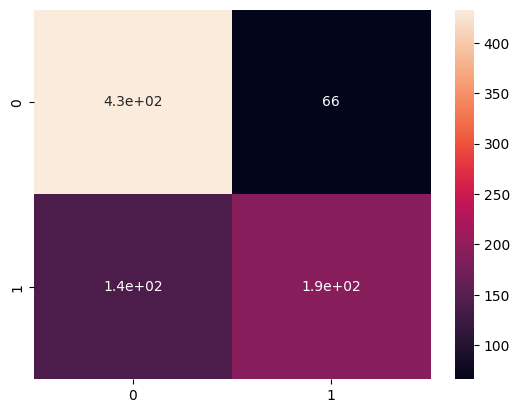

In [ ]:
# Initialize XGBoost classifier
model_xgb = xgb.XGBClassifier()

# Train the model
model_xgb.fit(X_train, y_train)

# Predict the labels for test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

# Show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True)

sebuah model XGBoost classifier diinisialisasi menggunakan `xgb.XGBClassifier()` dari library XGBoost. Kemudian, model tersebut dilatih menggunakan data pelatihan `(X_train dan y_train)` melalui metode `.fit()`. Setelah model dilatih, digunakan untuk memprediksi label dari data pengujian `(X_test)` dengan menggunakan metode .`predict()`, yang hasilnya disimpan dalam variabel `y_pred_xgb`.

Untuk mengevaluasi kinerja model, digunakan metrik klasifikasi seperti classification report dan confusion matrix. Classification report dapat dicetak menggunakan classification_report`(y_test, y_pred_xgb)`, yang memberikan ringkasan metrik evaluasi seperti presisi, recall, dan f1-score untuk setiap kelas. Selain itu, confusion matrix juga dicetak menggunakan `confusion_matrix(y_test, y_pred_xgb)`, yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.

Selanjutnya, menggunakan seaborn, confusion matrix tersebut juga divisualisasikan dalam bentuk heatmap dengan `sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True)`, di mana angka-angka pada heatmap menunjukkan jumlah prediksi yang benar dan salah untuk setiap kombinasi kelas. Hal ini membantu untuk dengan cepat memahami kinerja model XGBoost dalam melakukan klasifikasi terhadap data pengujian.

In [ ]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print(accuracy)

0.7518072289156627


#### Hiperparameter Tuning

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.7864628937890776
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       499
           1       0.85      0.56      0.68       331

    accuracy                           0.79       830
   macro avg       0.80      0.75      0.76       830
weighted avg       0.80      0.79      0.77       830

[[465  34]
 [144 187]]
0.7855421686746988


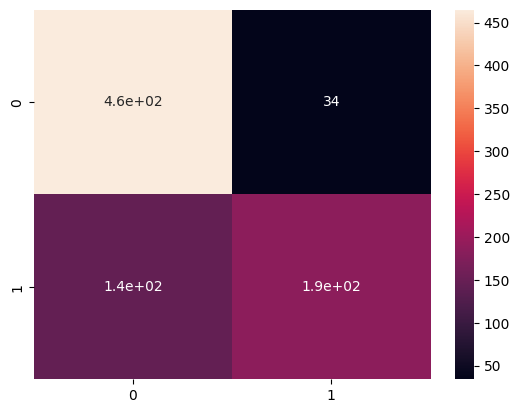

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt,
                              cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f"Best parameters for Decision Tree: {best_params_dt}")
print(f"Best cross-validation accuracy for Decision Tree: {best_score_dt}")

# Train the best model
best_dt = grid_search_dt.best_estimator_
best_dt.fit(X_train, y_train)

# Predict the labels for test set
y_pred_best_dt = best_dt.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_best_dt))
print(confusion_matrix(y_test, y_pred_best_dt))

# Show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best_dt), annot=True)

accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(accuracy_best_dt)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}
Best cross-validation accuracy for XGBoost: 0.8112798061346078
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       499
           1       0.89      0.59      0.71       331

    accuracy                           0.81       830
   macro avg       0.83      0.77      0.78       830
weighted avg       0.82      0.81      0.80       830

[[474  25]
 [135 196]]
0.8072289156626506


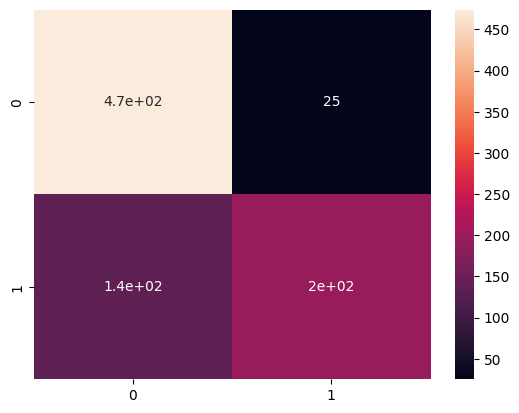

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid_xgb,
                               cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best parameters for XGBoost: {best_params_xgb}")
print(f"Best cross-validation accuracy for XGBoost: {best_score_xgb}")

# Train the best model
best_xgb = grid_search_xgb.best_estimator_
best_xgb.fit(X_train, y_train)

# Predict the labels for test set
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_best_xgb))
print(confusion_matrix(y_test, y_pred_best_xgb))

# Show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best_xgb), annot=True)

accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(accuracy_best_xgb)


**Penjelasan Tuning**
`Tuning` adalah proses mengoptimalkan hyperparameters model untuk meningkatkan kinerja prediksi. Hyperparameters adalah parameter yang nilainya ditetapkan sebelum proses pelatihan dimulai, dan tidak diperbarui selama pelatihan. Contoh hyperparameters adalah kedalaman pohon dalam Decision Tree, jumlah estimators dalam XGBoost, dan learning rate.

**Manfaat dan Tujuan Dilakukan Tuning**
- Meningkatkan Akurasi Model: Dengan menemukan kombinasi hyperparameters yang optimal, model dapat lebih akurat dalam memprediksi data yang belum pernah dilihat sebelumnya.
- Mengurangi Overfitting/Underfitting: Tuning dapat membantu menyeimbangkan model agar tidak terlalu kompleks (overfitting) atau terlalu sederhana (underfitting).
- Efisiensi Model: Dengan hyperparameters yang tepat, model dapat lebih efisien dalam hal waktu pelatihan dan penggunaan sumber daya.

`param_grid_dt` adalah dictionary yang digunakan untuk menentukan hyperparameters dan nilai-nilai yang akan diuji dalam proses grid search untuk model Decision Tree. Berikut adalah penjelasan masing-masing parameter:

- `criterion`: ['gini', 'entropy'] - Fungsi yang digunakan untuk mengukur kualitas split. 'gini' untuk Gini impurity dan 'entropy' untuk information gain.
- `max_depth`: [None, 10, 20, 30, 40, 50] - Kedalaman maksimum dari tree. None berarti node akan terus di-split sampai semua leaf nodes murni.
- `min_samples_split`: [2, 5, 10] - Jumlah minimum sampel yang dibutuhkan untuk split node.
- `min_samples_leaf`: [1, 2, 4] - Jumlah minimum sampel yang dibutuhkan untuk berada di leaf node.
- `max_features`: [None, 'auto', 'sqrt', 'log2'] - Jumlah fitur yang dipertimbangkan untuk menemukan split terbaik.

1. Untuk tuning model Decision Tree, pertama, kita mengimpor library yang diperlukan dan mendefinisikan parameter grid param_grid_dt. Parameter grid ini berisi berbagai kombinasi hyperparameters yang ingin diuji. Selanjutnya, kita inisialisasi GridSearchCV dengan estimator DecisionTreeClassifier dan parameter grid tersebut, kemudian melakukan fitting menggunakan data pelatihan (X_train dan y_train). Setelah proses grid search selesai, kita mengambil hyperparameters terbaik (best_params_) dan skor validasi silang terbaik (best_score_). Model terbaik dilatih ulang dengan data pelatihan dan dievaluasi menggunakan data uji (X_test), di mana hasil evaluasi ditampilkan menggunakan classification_report dan confusion_matrix.

2. Untuk tuning model XGBoost, prosesnya serupa. Kita mendefinisikan parameter grid param_grid_xgb untuk XGBoost, yang mencakup kombinasi berbagai hyperparameters yang relevan. Kemudian, kita inisialisasi GridSearchCV dengan estimator XGBClassifier dan parameter grid tersebut, lalu fitting dengan data pelatihan. Setelah itu, kita mendapatkan hyperparameters terbaik dan skor validasi silang terbaik. Model terbaik dilatih ulang dan dievaluasi menggunakan data uji, dengan hasil evaluasi yang ditampilkan melalui classification_report dan confusion_matrix.

#### Conclusion

Dari hasil evaluasi yang diberikan, terdapat perbedaan kinerja antara model Decision Tree Classifier dan model XGBoost Classifier:

**Decision Tree Classifier:**
- Akurasi: 68%
- Precision (kelas 0): 0.73
- Recall (kelas 0): 0.75
- F1-score (kelas 0): 0.74
- Precision (kelas 1): 0.61
- Recall (kelas 1): 0.59
- F1-score (kelas 1): 0.60

**XGBoost Classifier:**
- Akurasi: 75%
- Precision (kelas 0): 0.76
- Recall (kelas 0): 0.87
- F1-score (kelas 0): 0.81
- Precision (kelas 1): 0.74
- Recall (kelas 1): 0.58
- F1-score (kelas 1): 0.65

**Analisis:**
- XGBoost Classifier menunjukkan kinerja yang lebih baik secara umum dibandingkan dengan Decision Tree Classifier. XGBoost memiliki akurasi yang lebih tinggi (75% vs 68%) dan nilai precision, recall, serta F1-score yang lebih baik untuk kelas 0 (yang mewakili karyawan yang tidak pergi) dibandingkan Decision Tree.
- Namun, XGBoost memiliki recall yang lebih rendah untuk kelas 1 (karyawan yang pergi) dibandingkan Decision Tree, meskipun precision dan F1-score-nya lebih tinggi.
- Dari segi interpretasi, XGBoost lebih efektif dalam mengidentifikasi karyawan yang tidak akan pergi (kelas 0), sementara Decision Tree lebih baik dalam mengidentifikasi karyawan yang benar-benar pergi (kelas 1).

**Kesimpulan:**
- Dalam kasus ini, XGBoost Classifier lebih disarankan karena menunjukkan kinerja yang lebih baik secara umum dalam memprediksi apakah seorang karyawan akan pergi atau tidak.
- Namun, terdapat trade-off antara recall dan precision di antara kedua model. Jika keputusan yang lebih akurat tentang karyawan yang benar-benar pergi (kelas 1) lebih penting, maka mungkin lebih baik menggunakan Decision Tree Classifier. Tetapi jika meminimalkan jumlah karyawan yang salah diprediksi akan pergi (false negative) lebih penting, maka XGBoost Classifier akan menjadi pilihan yang lebih baik.

**Kesimpulan Hasil Tuning**

**Decision Tree Classifier:**
- Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
- Best cross-validation accuracy: 0.786
- Accuracy: 0.79
- Precision (kelas 0): 0.76
- Recall (kelas 0): 0.93
- F1-score (kelas 0): 0.84
- Precision (kelas 1): 0.85
- Recall (kelas 1): 0.56
- F1-score (kelas 1): 0.68

**XGBoost Classifier:**
- Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}
- Best cross-validation accuracy: 0.811
- Accuracy: 0.81
- Precision (kelas 0): 0.78
- Recall (kelas 0): 0.95
- F1-score (kelas 0): 0.86
- Precision (kelas 1): 0.89
- Recall (kelas 1): 0.59
- F1-score (kelas 1): 0.71

**Analisis**

Nilai recall yang rendah untuk kelas 1 (karyawan yang pergi) bisa disebabkan oleh:

- Imbalance Data: Jika jumlah karyawan yang pergi jauh lebih sedikit dibandingkan yang tetap, model mungkin lebih fokus pada prediksi kelas mayoritas.
- Overfitting pada Kelas Mayoritas: Model mungkin belajar lebih baik untuk memprediksi kelas mayoritas (karyawan yang tetap) dan mengabaikan kelas minoritas (karyawan yang pergi).
Saran
- Balancing Data: Gunakan teknik balancing seperti oversampling (SMOTE) atau undersampling untuk menyeimbangkan jumlah data pada setiap kelas.
Feature Engineering: Tambahkan lebih banyak fitur yang mungkin berpengaruh terhadap prediksi karyawan yang pergi.
- Ensemble Methods: Coba gunakan ensemble methods lainnya seperti Random Forest atau AdaBoost untuk melihat apakah ada peningkatan kinerja.
- Cost-sensitive Learning: Menggunakan cost-sensitive learning untuk memberi bobot lebih pada kelas minoritas agar model lebih sensitif terhadap karyawan yang pergi.